#HW 1: Linear Algebra and Floating Point Arithmetic

## **Direct Methods for the Solution of Linear Systems**

1. **Given a matrix** \\( A \in \mathbb{R}^{n \times n} \\), **the vector** \\( x_{\text{true}} = (1,1,\ldots,1)^T \in \mathbb{R}^n \\), **and a value for** \\( n \\), **write a script that:**  

   - Computes the right-hand side of the linear system:  
$$
y = A x_{\text{true}}
$$  
*(test problem)*  

   - Computes the **condition number** in **2-norm** of the matrix \\( A \\).  
     - Is it **ill-conditioned**?  
     - What if we use the **∞-norm** instead of the **2-norm**?  

   - Solves the linear system:  
$$
A x = y
$$  
using the function `np.linalg.solve()`  

   - Computes the **relative error** between the computed solution and the true solution \\( x_{\text{true}} \\).  

   - Plots a graph (using `matplotlib.pyplot`) with:  
     - Relative errors as a function of \\( n \\).  
     - Condition number in **2-norm** and **∞-norm** as a function of \\( n \\).  

---

2. **Test the program above with the following choices of** \\( A \in \mathbb{R}^{n \times n} \\):  

   - A **random matrix** (created with the function `np.random.rand()`) with size varying in:  
$$
n = \{10, 20, 30, \ldots, 100\}
$$  

   - The **Vandermonde matrix** (`np.vander`) with dimension:  
$$
n = \{5, 10, 15, 20, 25, 30\}
$$  
with respect to the vector:  
$$
v = 1, 2, 3, \ldots, n
$$  

   - The **Hilbert matrix** (`scipy.linalg.hilbert`) with dimension:  
$$
n = \{4, 5, 6, \ldots, 12\}
$$  

---



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import hilbert

 ###  - Computes the right-hand side of the linear system:  
$$
y = A x_{\text{true}}
$$  
*(test problem)*  

In [15]:
def compute_rhs(A, x):
    """
    Computes the right-hand side of the linear system y = A * x.

    Parameters:
        A (ndarray): The random n x n matrix.
        x (ndarray): The n x 1 vector.
        n (int): The dimension of the square matrix A and vector x.

    Returns:
        y (ndarray): The resulting vector y = A * x.
    """

    # Step 3: Compute y = A * x
    y = np.dot(A, x)

    return y

# Example Usage
n = 4  # Example size
A = np.random.rand(n, n)
x_true = np.ones(n)
y = compute_rhs(A, x_true)

print("Matrix A:")
print(A)
print("\nVector x_true:")
print(x_true)
print("\nResulting vector y:")
print(y)


Matrix A:
[[0.20386752 0.35212904 0.26869453 0.09796464]
 [0.53832535 0.50017333 0.61666189 0.05083922]
 [0.21693748 0.5666059  0.81184555 0.10409017]
 [0.62808988 0.28232492 0.20519369 0.6042195 ]]

Vector x_true:
[1. 1. 1. 1.]

Resulting vector y:
[0.92265572 1.70599979 1.69947909 1.71982799]


   ### - Computes the **condition number** in **2-norm** of the matrix \\( A \\).  
     - Is it **ill-conditioned**?  
     - What if we use the **∞-norm** instead of the **2-norm**?  


In [16]:
def compute_condition_number_and_check_condition(A, norm_type='2', threshold=1e3):
    """
    Computes the condition number of the matrix A in a given norm.

    Parameters:
        A (ndarray): The input matrix.
        norm_type (str): The type of norm to use ('2' for 2-norm, 'inf' for inf-norm).

    Returns:
        cond_number (float): The condition number of A in the given norm.
    """
    if norm_type == '2':
        # 2-norm condition number
        cond_number = np.linalg.norm(A, 2) * np.linalg.norm(np.linalg.inv(A), 2)
    elif norm_type == 'inf':
        # Inf-norm condition number
        cond_number = np.linalg.norm(A, np.inf) * np.linalg.norm(np.linalg.inv(A), np.inf)
    else:
        raise ValueError("norm_type must be either '2' or 'inf'")
    if cond_number > threshold:
        condtion = "Ill-conditioned"
    else:
        condtion = "Well-conditioned"
    return cond_number, condtion

# Compute the condition number in the 2-norm
cond_number_2, condition = compute_condition_number_and_check_condition(A, norm_type='2')
print(f"Condition number in 2-norm: {cond_number_2}, and the matrix is {condition}")

# Compute the condition number in the inf-norm
cond_number_inf, condition = compute_condition_number_and_check_condition(A, norm_type='inf')
print(f"Condition number in inf-norm: {cond_number_inf} and the matrix is {condition}")


Condition number in 2-norm: 14.925308654716646, and the matrix is Well-conditioned
Condition number in inf-norm: 18.453132499206593 and the matrix is Well-conditioned


The Other Way

In [17]:
print(np.linalg.cond(A, 2))
print(np.linalg.cond(A, np.inf))

14.925308654716646
18.453132499206593


example for ill-conditioned

In [18]:
A_ill = np.array([[1, 1], [1, 1.0001]])
cond_number_2, condition = compute_condition_number_and_check_condition(A_ill, norm_type='2')
print(f"Condition number in 2-norm: {cond_number_2}, and the matrix is {condition}")


Condition number in 2-norm: 40002.00007500565, and the matrix is Ill-conditioned


In [19]:
cond_number_inf, condition = compute_condition_number_and_check_condition(A_ill, norm_type='inf')
print(f"Condition number in inf-norm: {cond_number_inf} and the matrix is {condition}")

Condition number in inf-norm: 40004.0001000044 and the matrix is Ill-conditioned


In [20]:
print(np.linalg.cond(A_ill, 2))
print(np.linalg.cond(A_ill, np.inf))

40002.00007491187
40004.0001000044


  ### - Solves the linear system:  
$$
A x = y
$$  
using the function `np.linalg.solve()`  

   - Computes the **relative error** between the computed solution and the true solution \\( x_{\text{true}} \\).  



In [23]:
def solve_and_compute_error(A, y, x_true):
    """
    Solve Ax = y and compute the relative error.

    Parameters:
        A (numpy.ndarray): Coefficient matrix.
        x_true (numpy.ndarray): True solution vector.

    Returns:
        x_computed (numpy.ndarray): Computed solution vector.
        relative_error (float): Relative error between true and computed solutions.
    """

    # Solve Ax = y
    x_computed = np.linalg.solve(A, y)

    # Compute the relative error
    relative_error = np.linalg.norm(x_true - x_computed) / np.linalg.norm(x_true)

    return x_computed, relative_error

y = compute_rhs(A, x_true)
x_computed, relative_error = solve_and_compute_error(A, y, x_true)
print(f"Computed solution: {x_computed}")
print(f"Relative error: {relative_error}")

Computed solution: [1. 1. 1. 1.]
Relative error: 4.1540741810552243e-16


###   - Plots a graph (using `matplotlib.pyplot`) with:  
     - Relative errors as a function of \\( n \\).  
     - Condition number in **2-norm** and **∞-norm** as a function of \\( n \\).  
The example is after the test

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def plot(n_array, errors , cond_2, cond_inf):
    # Create the figure for both graphs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot relative errors
    ax1.plot(n_array, errors, label="Relative Error", color='blue')
    ax1.set_xlabel('n')
    ax1.set_ylabel('Relative Error')
    ax1.set_title('Relative Error vs n')
    ax1.grid(True)

    # Plot condition numbers
    ax2.plot(n_array, cond_2, label="Condition Number (2-norm)", color='red')
    ax2.plot(n_array, cond_inf, label="Condition Number (inf-norm)", color='green')
    ax2.set_xlabel('n')
    ax2.set_ylabel('Condition Number')
    ax2.set_title('Condition Number vs n')
    ax2.grid(True)
    ax2.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()


### TEST

### Random Matrix

In [41]:
errors = []
cond_2 = []
cond_inf = []
n_array = range(10, 110, 10)
for n in n_array:
  A = np.random.rand(n, n)
  x_true = np.ones(n)
  y = compute_rhs(A, x_true)
  cond_number_2, condition = compute_condition_number_and_check_condition(A, norm_type='2')
  cond_number_inf, condition = compute_condition_number_and_check_condition(A, norm_type='inf')
  x_computed, relative_error = solve_and_compute_error(A, y, x_true)
  errors.append(relative_error)
  cond_2.append(cond_number_2)
  cond_inf.append(cond_number_inf)


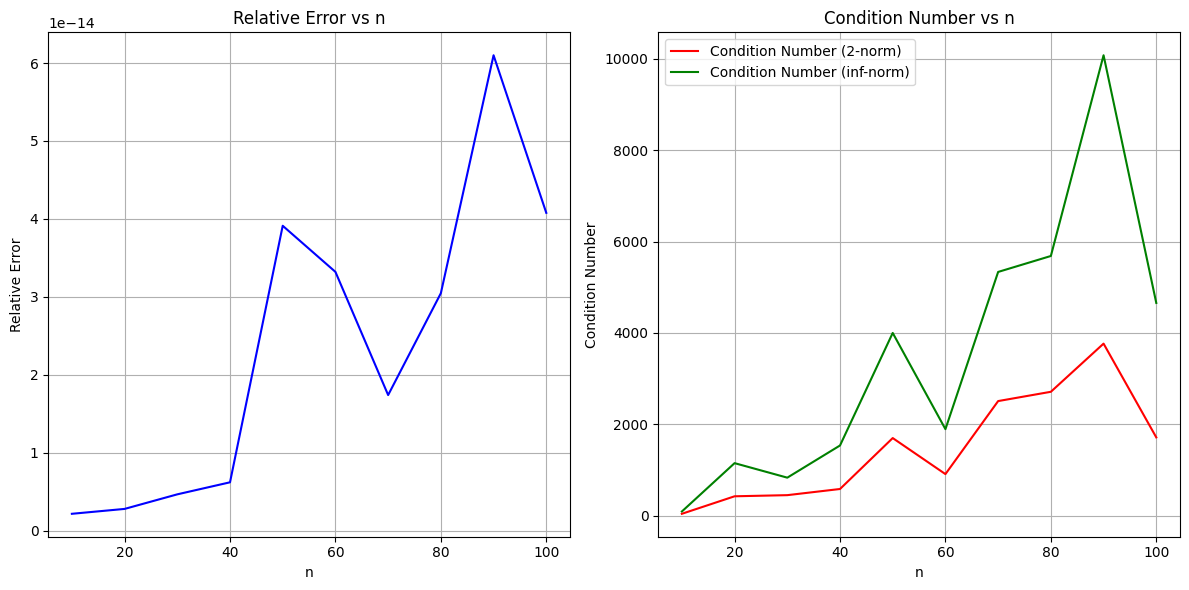

In [42]:
plot(n_array, errors , cond_2, cond_inf)

### Vandermonde matrix

In [43]:
errors = []
cond_2 = []
cond_inf = []
n_array = range(10, 110, 10)
for n in n_array:
  A = np.vander(range(1, n+1), n)
  x_true = np.ones(n)
  y = compute_rhs(A, x_true)
  cond_number_2, condition = compute_condition_number_and_check_condition(A, norm_type='2')
  cond_number_inf, condition = compute_condition_number_and_check_condition(A, norm_type='inf')
  x_computed, relative_error = solve_and_compute_error(A, y, x_true)
  errors.append(relative_error)
  cond_2.append(cond_number_2)
  cond_inf.append(cond_number_inf)


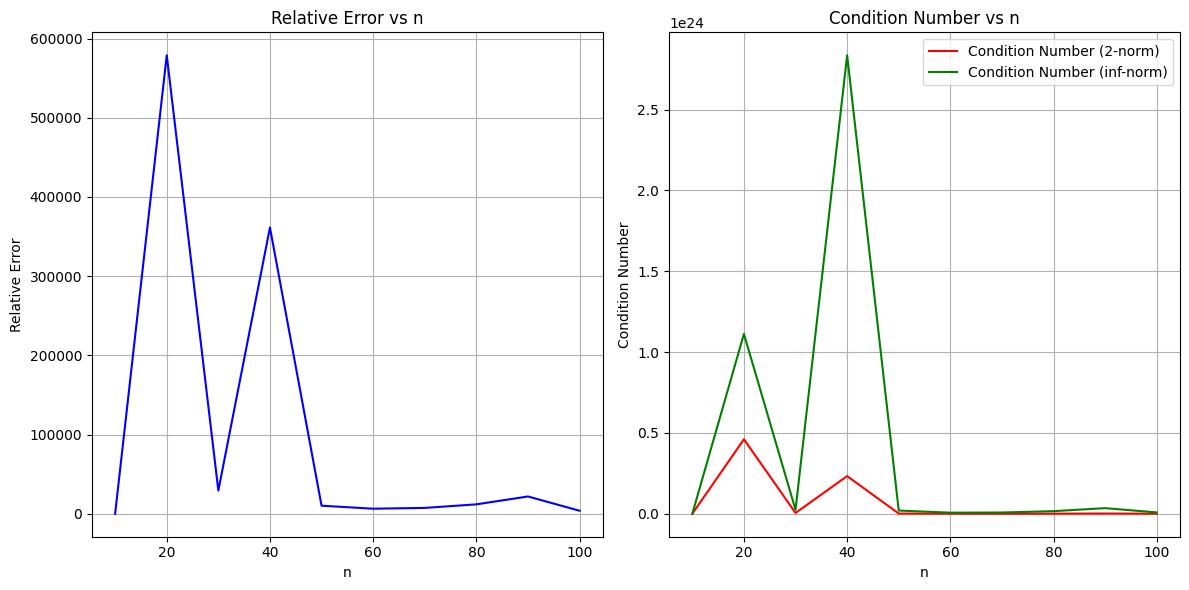

In [44]:
plot(n_array, errors , cond_2, cond_inf)

In [45]:
errors = []
cond_2 = []
cond_inf = []
n_array = range(10, 110, 10)
for n in n_array:
  A = hilbert(n)
  x_true = np.ones(n)
  y = compute_rhs(A, x_true)
  cond_number_2, condition = compute_condition_number_and_check_condition(A, norm_type='2')
  cond_number_inf, condition = compute_condition_number_and_check_condition(A, norm_type='inf')
  x_computed, relative_error = solve_and_compute_error(A, y, x_true)
  errors.append(relative_error)
  cond_2.append(cond_number_2)
  cond_inf.append(cond_number_inf)


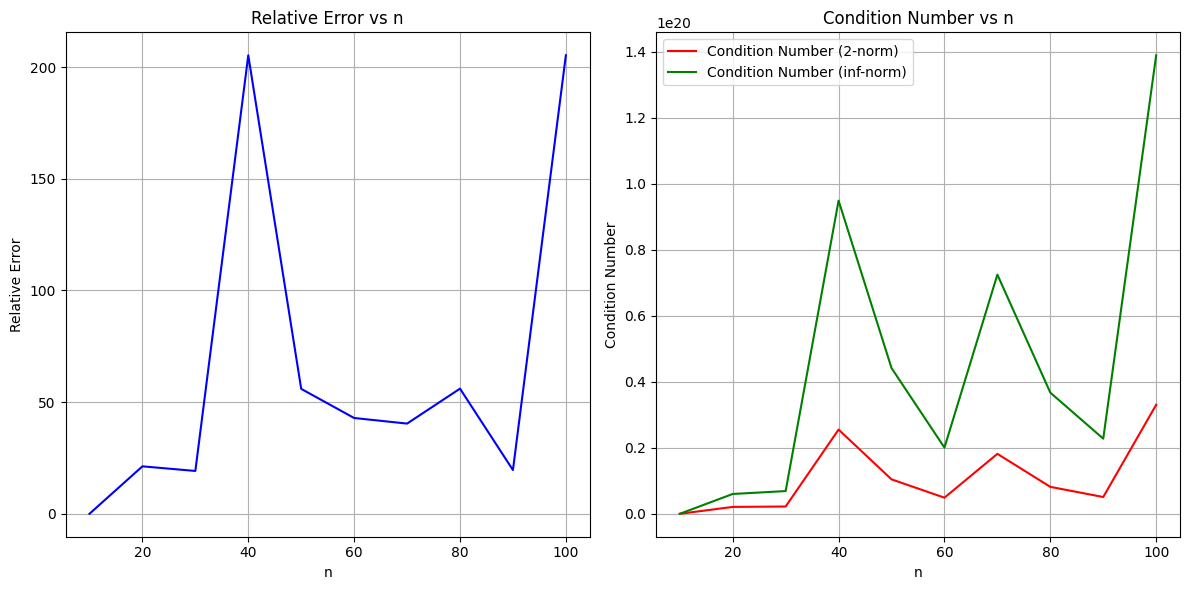

In [46]:
plot(n_array, errors , cond_2, cond_inf)